# Project - CICESE
- Ocean Waves Course

In [105]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde
from IPython.display import Image
from IPython.core.display import HTML
%matplotlib inline

In [309]:
def calculate_potential_energy(Hs, Tp):

    # water density kg/m3
    p = 1025

    # gravity acceleration m/s2
    g = 9.81

    # wave energy potential (W/m)
    P = (p * g ** 2 / (64 * np.pi)) * Hs ** 2 * Tp
    
    # wave energy potential (kW/m)
    P = P / 1000.0
    return P

In [289]:
def plot_potential_energy(title, h, t):

    # matrix for wave height and period
    H, T = np.meshgrid(h, t)

    # water density kg/m3
    p = 1025

    # gravity acceleration m/s2
    g = 9.81

    # wave energy potential (W/m)
    P = (p * g ** 2 / (64 * np.pi)) * H ** 2 * T
    
    # wave energy potential (kW/m)
    P = P / 1000.0

    # plot mean values
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111)
    CT = ax.contourf(H, T, P, 50)
    ax.set_title(title)
    ax.set_xlabel('Significant Wave Height (m)')
    ax.set_ylabel('Peak Period (sec)')
    cbar = plt.colorbar(CT)
    cbar.set_label('kW/m', rotation=270)
    
    return ax

In [269]:
def plot_time_series(title, time, hs, tp, dp):
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.plot(time, hs)
    plt.title(points.location.iloc[i] + ' ' + name)
    plt.ylabel('Hs (m)')
    plt.grid()
    plt.subplot(122)
    plt.plot(dd.index, dd.Tp)
    plt.title(points.location.iloc[i] + ' ' + name)
    plt.ylabel('Tp (s)')
    plt.grid()

In [270]:
def plot_scatter():
    
    # Calculate the point density    
    dd = dd['2005':'2009']
    dd = dd.resample('D').mean()
    xy = np.vstack([dd.Hs,dd.Tp])
    dd['occurence'] = gaussian_kde(xy)(xy)
    fig, ax = plt.subplots()
    dd.plot.scatter(x='Hs', y='Tp', c='occurence', s=100, colormap='viridis', ax=ax) #figsize=(8,6))
    ax.set_xlabel('Hs')
    ax.set_title(name[:-4])

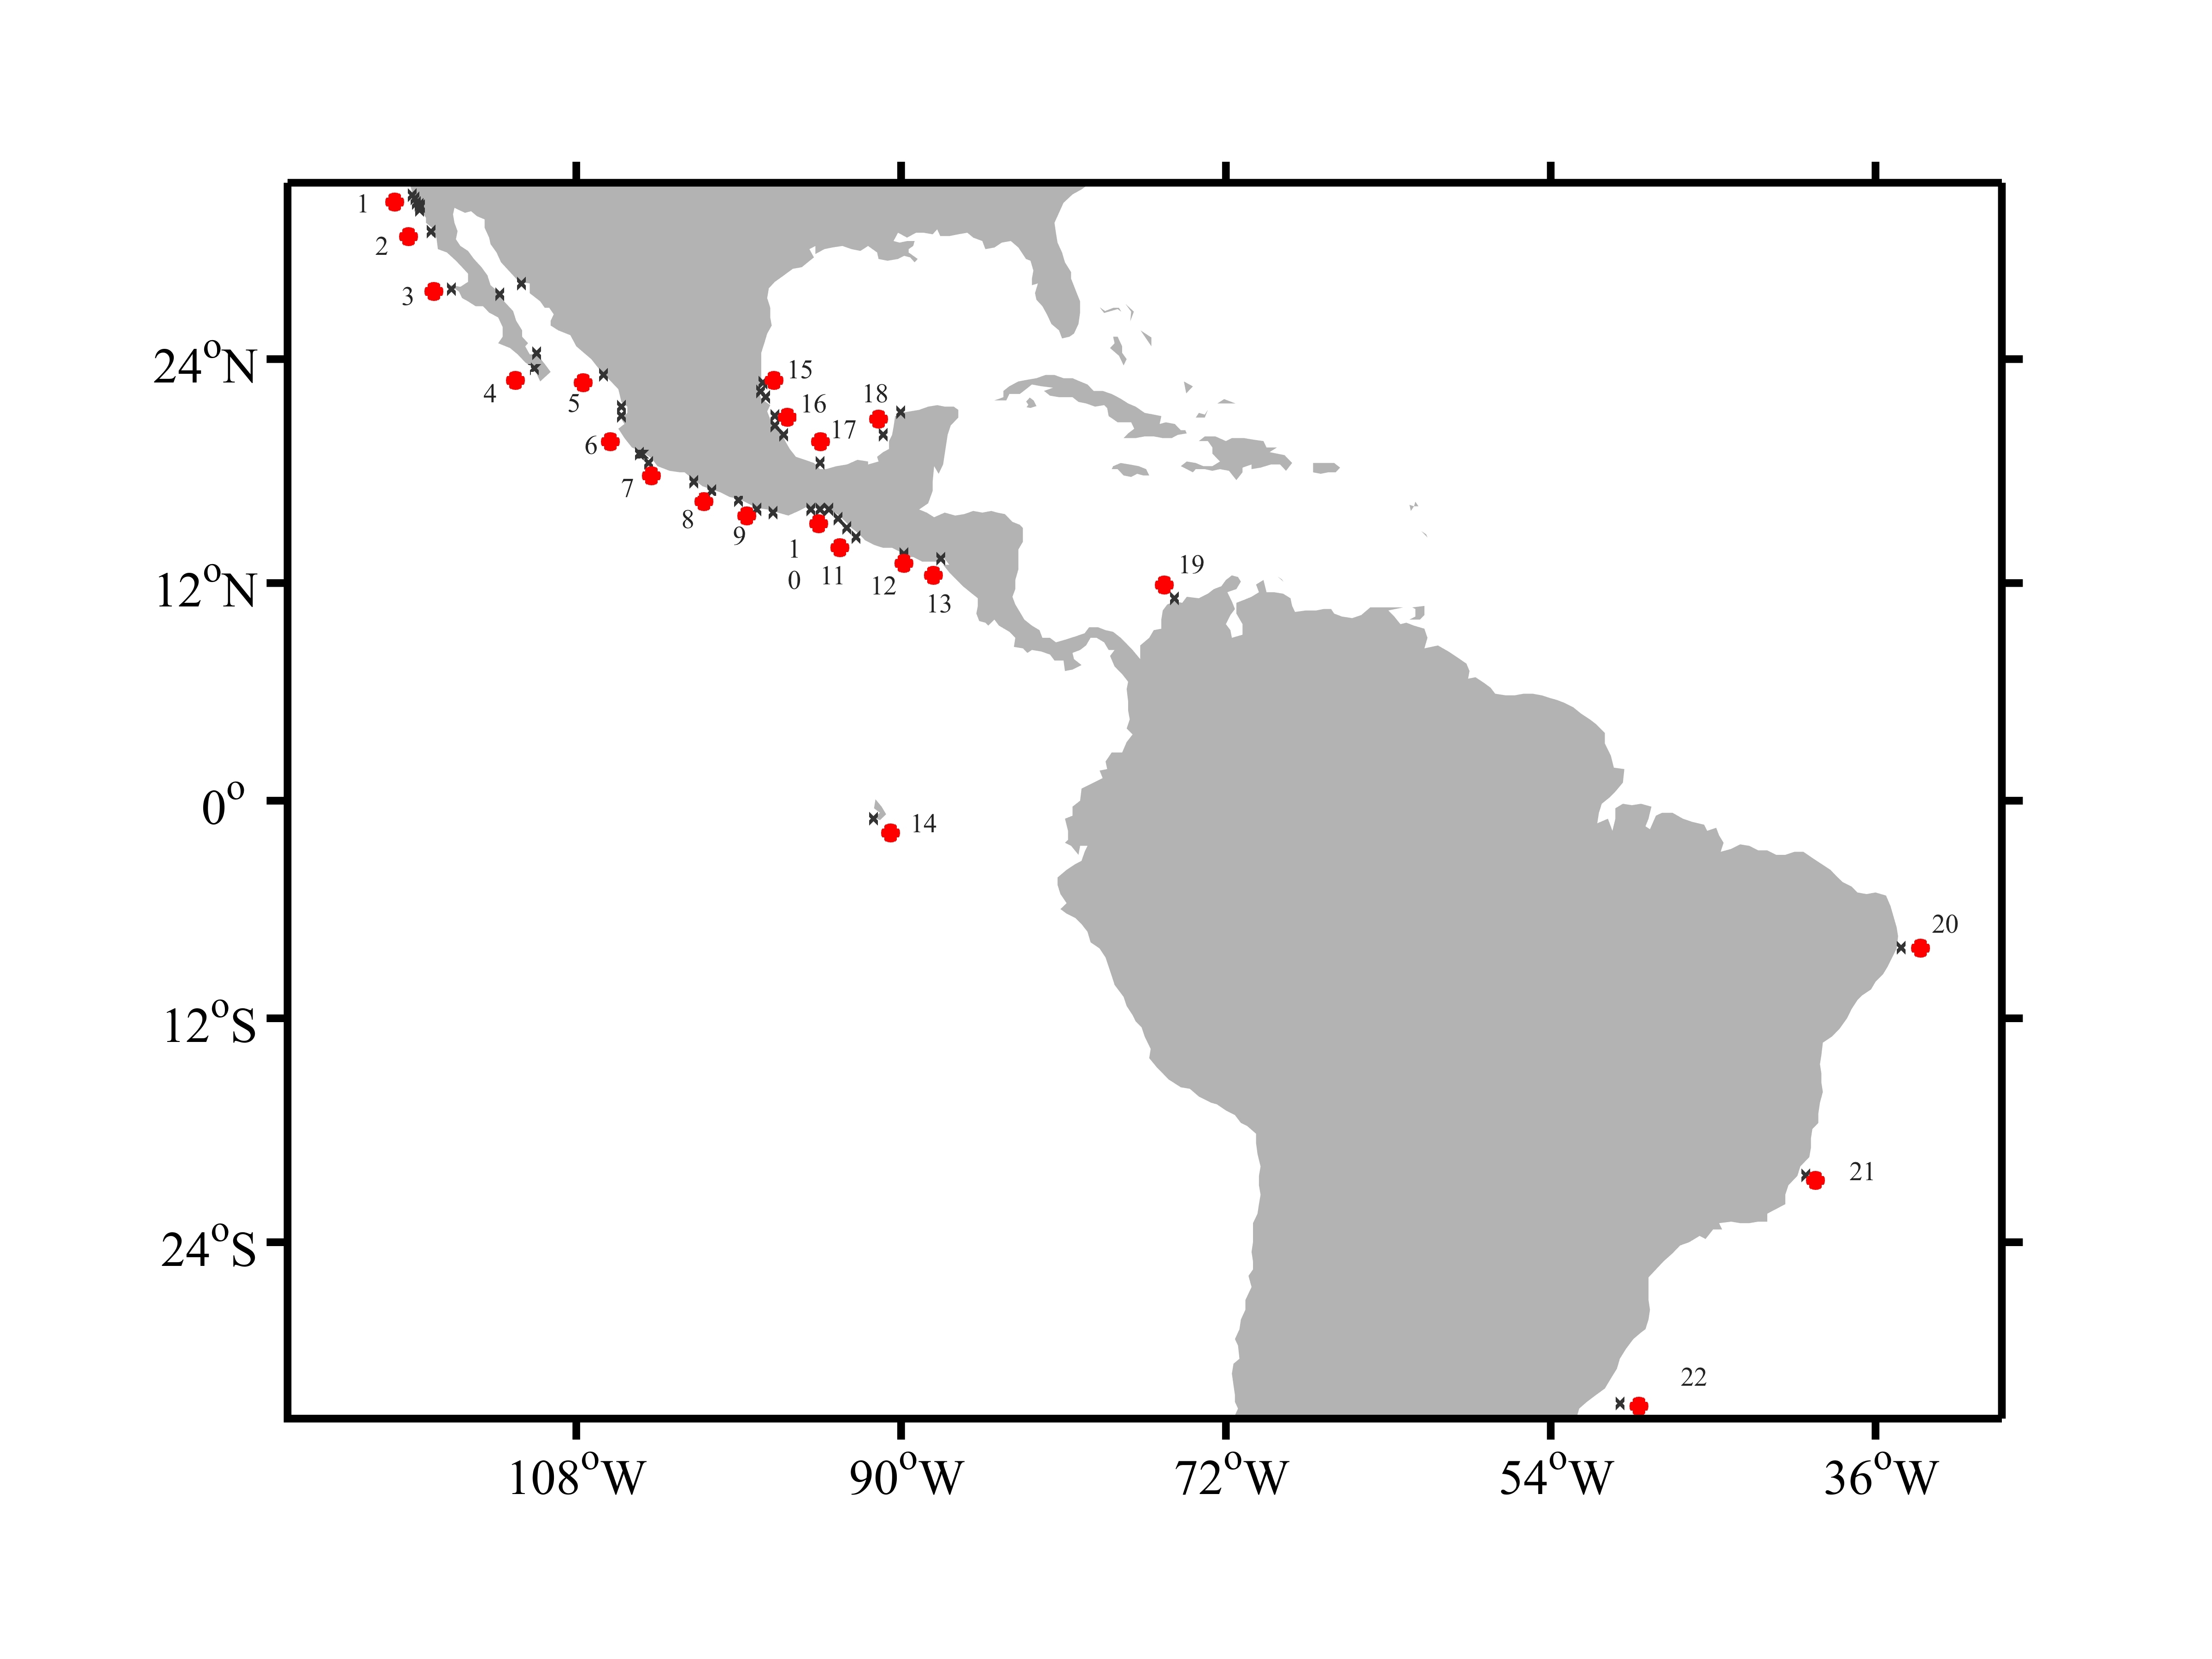

In [227]:
# display the data location
Image(filename= "/home/lioc/Dropbox/cicese/data/corrected_locations.jpg", width=800, height=100)

## Read data points

In [430]:
points = pd.read_csv('../data/points.csv')
# points['location'][1:] = points['location'][:-1]
# points.drop('p01', inplace=True)
# points.drop(0, inplace=True)
# points = points[1:]
points

,point,location
0,p01,Ensenada
1,p02,Bahia_Tortuga
2,p03,Todos_Santos
3,p04,Mazatlan
4,p05,Puerto_Vallarta
5,p06,Colima
6,p07,Guerrero
7,p08,Oaxaca
8,p09,Chiapas_Itsmo
9,p10,Chiapas_Frontera


## Read WW3 wave data

In [435]:
# pathname of the data
pathname = os.environ['HOME'] + '/Documents/cicese/data/ww3_cicese/'

names = np.sort(os.listdir(pathname))
names

array(['p01.csv', 'p02.csv', 'p03.csv', 'p04.csv', 'p05.csv', 'p06.csv',
       'p07.csv', 'p08.csv', 'p09.csv', 'p10.csv', 'p11.csv', 'p12.csv',
       'p13.csv', 'p14.csv', 'p15.csv', 'p16.csv', 'p17.csv', 'p18.csv',
       'p19.csv', 'p20.csv', 'p21.csv'], dtype='<U7')

In [436]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H')

# points = points[:len(names)]

# list of Hs, Tp, Hmax, Tmax
mm = []
i = -1
for name in names:
    
    i += 1
    
    dd = pd.read_csv(pathname + name, parse_dates=[['Date','Hora']],
                     date_parser=dateparse, index_col=['Date_Hora'])
    
    print ("---------")
    print (points.location.iloc[i])
    print (dd[['Hs','Tp']].describe())

    a = list(dd[['Hs','Tp']].mean())
    b = list(dd[['Hs','Tp']].quantile(0.95))
    
    mm.append(a + b)
    
df = pd.DataFrame(mm, index=points.location, columns=['Hs','Tp','Hs_max','Tp_max'])

---------
Ensenada
                  Hs             Tp
count  271008.000000  271008.000000
mean        1.984342       6.679290
std         0.671223       1.651238
min         0.677654       3.636110
25%         1.519065       5.466115
50%         1.835860       6.327160
75%         2.281085       7.515150
max        10.097100      16.671800
---------
Bahia_Tortuga
                  Hs             Tp
count  271008.000000  271008.000000
mean        1.880031       6.654885
std         0.534629       1.531555
min         0.717270       3.770490
25%         1.514160       5.532847
50%         1.772320       6.308195
75%         2.123190       7.414025
max         7.512530      16.704900
---------
Todos_Santos
                  Hs             Tp
count  271008.000000  271008.000000
mean        1.743561       6.696819
std         0.440726       1.553832
min         0.710025       3.779000
25%         1.450400       5.557940
50%         1.668745       6.331880
75%         1.945133       7.48868

## Plot Potential Energy for all points

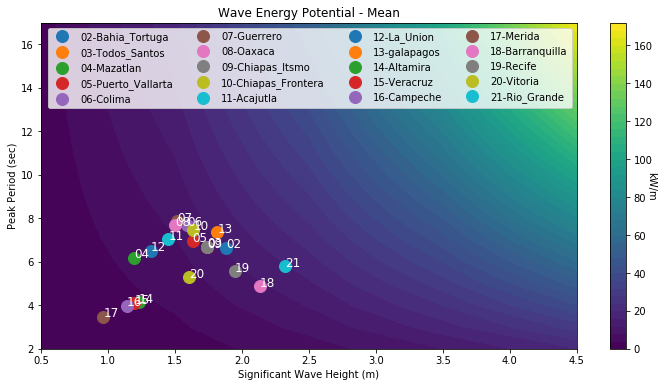

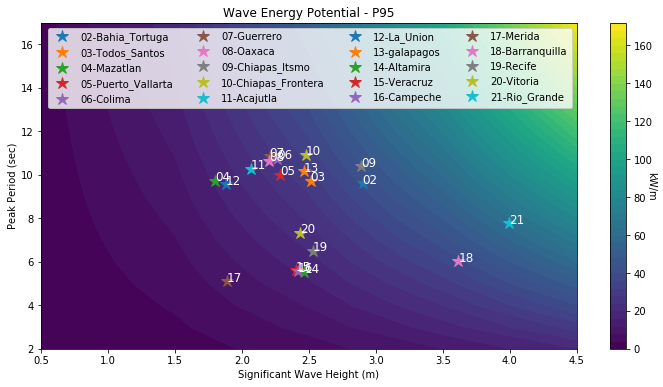

In [437]:
plot_potential_energy(title= 'Wave Energy Potential - Mean', h=np.arange(0.5,5), t=np.arange(2,18))

for i in np.arange(1,len(df)):
    plt.text(df.Hs[i], df.Tp[i], points.point[i][1:], color='w', fontsize=12)
    plt.plot(df.Hs[i], df.Tp[i], 'o', markersize=12, label=points.point[i][1:] + '-' + df.index[i])

plt.legend(ncol=4)

plot_potential_energy(title= 'Wave Energy Potential - P95', h=np.arange(0.5,5), t=np.arange(2,18))

for i in np.arange(1,len(df)):
    plt.text(df.Hs_max[i], df.Tp_max[i], points.point[i][1:], color='w', fontsize=12)
    plt.plot(df.Hs_max[i], df.Tp_max[i], '*', markersize=12, label=points.point[i][1:] + '-' + df.index[i])

plt.legend(ncol=4)
plt.show()

## Compare process of RIG, VIX and REC

In [438]:
# read data

dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H')

rec = pd.read_csv(pathname + 'p19.csv', parse_dates=[['Date','Hora']],
                 date_parser=dateparse, index_col=['Date_Hora'])

vix = pd.read_csv(pathname + 'p20.csv', parse_dates=[['Date','Hora']],
                 date_parser=dateparse, index_col=['Date_Hora'])

rig = pd.read_csv(pathname + 'p21.csv', parse_dates=[['Date','Hora']],
                 date_parser=dateparse, index_col=['Date_Hora'])

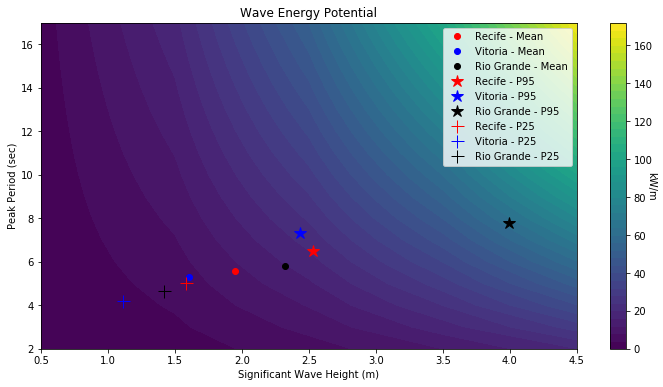

In [462]:
plot_potential_energy(title= 'Wave Energy Potential', h=np.arange(0.5,5), t=np.arange(2,18))
plt.plot(rec.Hs.mean(), rec.Tp.mean(), 'ro', label='Recife - Mean')
plt.plot(vix.Hs.mean(), vix.Tp.mean(), 'bo', label='Vitoria - Mean')
plt.plot(rig.Hs.mean(), rig.Tp.mean(), 'ko', label='Rio Grande - Mean')
plt.plot(rec.Hs.quantile(0.95), rec.Tp.quantile(0.95), 'r*', markersize=13, label='Recife - P95')
plt.plot(vix.Hs.quantile(0.95), vix.Tp.quantile(0.95), 'b*', markersize=13, label='Vitoria - P95')
plt.plot(rig.Hs.quantile(0.95), rig.Tp.quantile(0.95), 'k*', markersize=13, label='Rio Grande - P95')
plt.plot(rec.Hs.quantile(0.1), rec.Tp.quantile(0.1), 'r+', markersize=13, label='Recife - P25')
plt.plot(vix.Hs.quantile(0.1), vix.Tp.quantile(0.1), 'b+', markersize=13, label='Vitoria - P25')
plt.plot(rig.Hs.quantile(0.1), rig.Tp.quantile(0.1), 'k+', markersize=13, label='Rio Grande - P25')
plt.legend()

In [418]:
rec.describe()

,Unnamed: 0,Longitud,Latitud,Hs,Tp,Dia,Mes,Anio
count,271008.000000,2.710080e+05,2.710080e+05,271008.000000,271008.000000,271008.000000,271008.000000,271008.000000
mean,135503.500000,-3.350650e+01,-8.145100e+00,1.947919,5.569957,15.729189,6.537991,1994.041180
std,78233.415214,9.313101e-11,2.522964e-11,0.319759,0.520506,8.799822,3.441289,8.922072
min,0.000000,-3.350650e+01,-8.145100e+00,1.026680,4.039060,1.000000,1.000000,1979.000000
25%,67751.750000,-3.350650e+01,-8.145100e+00,1.724490,5.226198,8.000000,4.000000,1986.000000
50%,135503.500000,-3.350650e+01,-8.145100e+00,1.907220,5.496155,16.000000,7.000000,1994.000000
75%,203255.250000,-3.350650e+01,-8.145100e+00,2.127740,5.815372,23.000000,10.000000,2002.000000
max,271007.000000,-3.350650e+01,-8.145100e+00,3.774430,10.851700,31.000000,12.000000,2009.000000


In [419]:
rig.describe()

,Unnamed: 0,Longitud,Latitud,Hs,Tp,Dia,Mes,Anio
count,271008.000000,2.710080e+05,2.710080e+05,271008.000000,271008.000000,271008.000000,271008.000000,271008.000000
mean,135503.500000,-4.912350e+01,-3.237830e+01,2.320961,5.786509,15.729189,6.537991,1994.041180
std,78233.415214,2.087863e-10,1.721648e-11,0.871282,1.026375,8.799822,3.441289,8.922072
min,0.000000,-4.912350e+01,-3.237830e+01,0.643187,3.211980,1.000000,1.000000,1979.000000
25%,67751.750000,-4.912350e+01,-3.237830e+01,1.712250,5.057310,8.000000,4.000000,1986.000000
50%,135503.500000,-4.912350e+01,-3.237830e+01,2.149210,5.601795,16.000000,7.000000,1994.000000
75%,203255.250000,-4.912350e+01,-3.237830e+01,2.724000,6.321440,23.000000,10.000000,2002.000000
max,271007.000000,-4.912350e+01,-3.237830e+01,9.709950,12.230000,31.000000,12.000000,2009.000000


In [420]:
vix.describe()

,Unnamed: 0,Longitud,Latitud,Hs,Tp,Dia,Mes,Anio
count,271008.000000,2.710080e+05,2.710080e+05,271008.000000,271008.000000,271008.000000,271008.000000,271008.000000
mean,135503.500000,-3.932250e+01,-2.074630e+01,1.603653,5.285378,15.729189,6.537991,1994.041180
std,78233.415214,1.778350e-10,2.659211e-11,0.445221,1.054686,8.799822,3.441289,8.922072
min,0.000000,-3.932250e+01,-2.074630e+01,0.603450,3.159830,1.000000,1.000000,1979.000000
25%,67751.750000,-3.932250e+01,-2.074630e+01,1.292498,4.514267,8.000000,4.000000,1986.000000
50%,135503.500000,-3.932250e+01,-2.074630e+01,1.532060,5.047925,16.000000,7.000000,1994.000000
75%,203255.250000,-3.932250e+01,-2.074630e+01,1.828270,5.817115,23.000000,10.000000,2002.000000
max,271007.000000,-3.932250e+01,-2.074630e+01,5.957960,12.571800,31.000000,12.000000,2009.000000


## Calculate Potential Energy with mean values

In [421]:
P_rig = calculate_potential_energy(rig.Hs.mean(), rig.Tp.mean())
P_vix = calculate_potential_energy(vix.Hs.mean(), vix.Tp.mean())
P_rec = calculate_potential_energy(rec.Hs.mean(), rec.Tp.mean())
print (P_rig, P_vix, P_rec)

15.292700235207867 6.66851541784097 10.368736773928383


## Calculate the mean of Potential time series

In [422]:
P_rig = calculate_potential_energy(rig.Hs, rig.Tp).mean()
P_vix = calculate_potential_energy(vix.Hs, vix.Tp).mean()
P_rec = calculate_potential_energy(rec.Hs, rec.Tp).mean()
print (P_rig, P_vix, P_rec)

18.970467539025055 7.559015258259301 10.800761132113355


## Plot Hs, Tp and Potential Energy for all 3 places - 1 year

In [451]:
def plot_hs_tp_pot(time, hs1, tp1, pot1, hs2, tp2, pot2, hs3, tp3, pot3):
    
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(311)
    ax1.plot(time, hs1, time, hs2, time, hs3)
    plt.legend(['RIG', 'VIX', 'REC'])
    ax1.set_ylabel('Hs (m)')
    ax1.grid()
    ax2 = fig.add_subplot(312)
    ax2.plot(time, tp1, time, tp2, time, tp3)
    ax2.set_ylabel('Tp (s)')
    ax2.grid()
    ax3 = fig.add_subplot(313)
    ax3.plot(time, pot1, '-', time, pot2, '-', time, pot3, '-')
    ax3.set_ylabel('Wave Pow. Pot (kW/m)')
    ax3.grid()
#     ax3.set_ylim(0,20)
    return

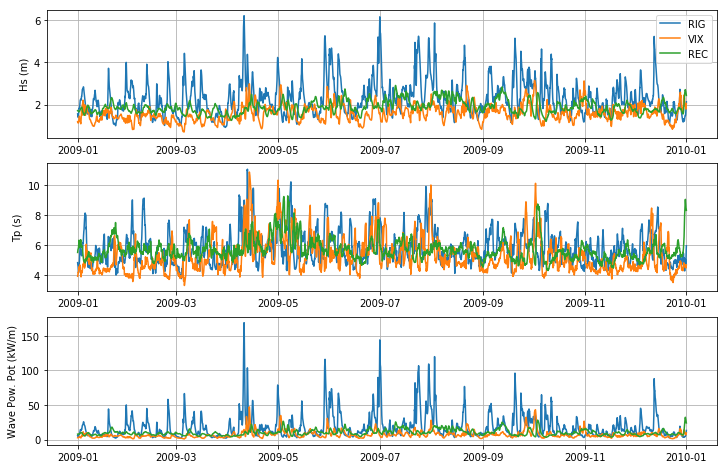

In [452]:
rig1, vix1, rec1 = rig['2009'], vix['2009'], rec['2009']


P_rig1 = calculate_potential_energy(rig1.Hs, rig1.Tp)
P_vix1 = calculate_potential_energy(vix1.Hs, vix1.Tp)
P_rec1 = calculate_potential_energy(rec1.Hs, rec1.Tp)

plot_hs_tp_pot(rig1.index, rig1.Hs, rig1.Tp, P_rig1, vix1.Hs, vix1.Tp, P_vix1, rec1.Hs, rec1.Tp, P_rec1)


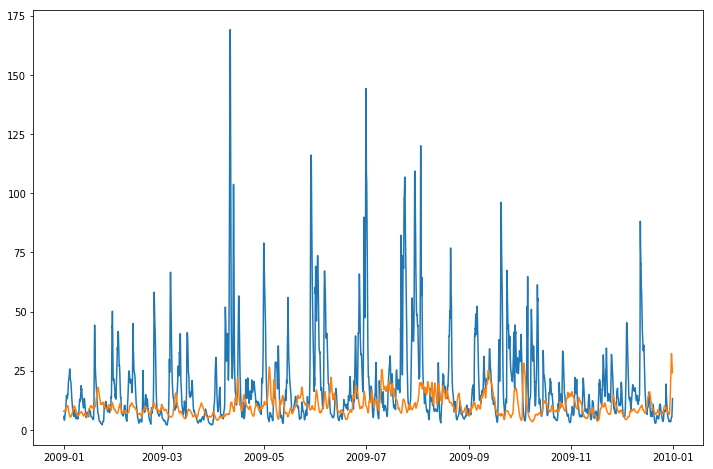

In [425]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
ax1.plot(rig1.index, P_rig1, rec1.index, P_rec1)
# plt.legend(['RIG', 'VIX', 'REC'])
# ax2 = fig.add_subplot(312)
# ax2.plot(time, tp1, time, tp2, time, tp3)
# ax3 = fig.add_subplot(313)
# ax3.plot(time, pot1, '-', time, pot2, '-', time, pot3, '-')
#     ax3.set_ylim(0,20)


In [470]:
p1 = calculate_potential_energy(2.3, 5.7)
p2 = calculate_potential_energy(1.6, 5.2)
p3 = calculate_potential_energy(1.9, 5.6)

print (p1, p2, p3)

14.793214726930616 6.53093471445297 9.918072129460729


In [468]:
df

,Hs,Tp,Hs_max,Tp_max
location,,,,
Ensenada,1.984342,6.679290,3.289306,9.955821
Bahia_Tortuga,1.880031,6.654885,2.902022,9.610208
Todos_Santos,1.743561,6.696819,2.513773,9.725810
Mazatlan,1.193019,6.179620,1.802792,9.728675
Puerto_Vallarta,1.631880,6.946487,2.286980,10.006265
Colima,1.589234,7.672628,2.265989,10.748300
Guerrero,1.516998,7.876029,2.206693,10.867865
Oaxaca,1.501775,7.674232,2.205430,10.639965
Chiapas_Itsmo,1.739581,6.675926,2.889059,10.390365


## Process device efficiency

### Aquabuoy

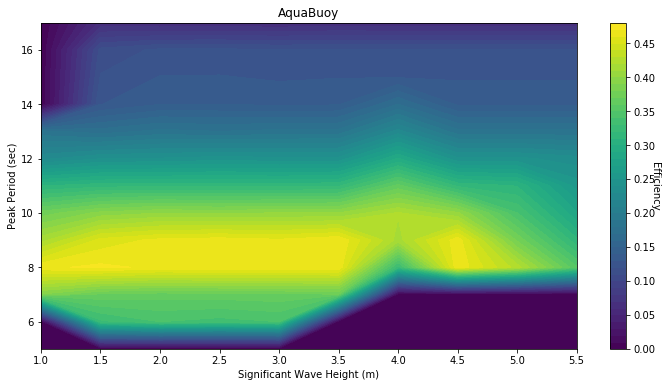

In [523]:
pathname = '/home/lioc/Documents/cicese/data/Final_data/'
filename = 'aquabuoy.csv'
df = pd.read_csv(pathname + filename)
# type(df.Periodo.data)

t = np.arange(5,18)
h = np.arange(1,6,0.5)
# h = df.Periodo.values
# t = df.columns[1:].values

# matrix for wave height and period
H, T = np.meshgrid(h, t)

ef = np.array(df.iloc[:,1:])

# plot mean values
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
CT = ax.contourf(H, T, ef.T, 50)
# ax.set_title(title)
ax.set_xlabel('Significant Wave Height (m)')
ax.set_ylabel('Peak Period (sec)')
ax.set_title('AquaBuoy')
cbar = plt.colorbar(CT)
cbar.set_label('Efficiency', rotation=270)


In [529]:
df

,Periodo,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.5,0.349904,0.524859,0.629838,0.699831,0.749833,0.787344,0.816528,0.839885,0.859005,0.874949,0.888450,0.900034,0.910084,0.918888,0.926669
1,1.0,0.102601,0.153903,0.184685,0.205209,0.219872,0.230871,0.239429,0.246278,0.251885,0.256561,0.260521,0.263918,0.266866,0.269449,0.271731
2,1.5,0.047990,0.071986,0.086385,0.095985,0.102843,0.107988,0.111992,0.115196,0.117819,0.120007,0.121860,0.123450,0.124830,0.126039,0.127107
3,2.0,0.027215,0.040823,0.048989,0.054433,0.058323,0.061241,0.063512,0.065329,0.066817,0.068059,0.069110,0.070012,0.070795,0.071482,0.072089
4,2.5,0.017299,0.025948,0.031139,0.034599,0.037072,0.038927,0.040370,0.041526,0.042472,0.043261,0.043930,0.044504,0.045003,0.045439,0.045826
5,3.0,0.011792,0.017688,0.021226,0.023585,0.025270,0.026535,0.027519,0.028307,0.028952,0.029491,0.029947,0.030339,0.030679,0.030977,0.031241
6,3.5,0.008523,0.012784,0.015342,0.017047,0.018265,0.019180,0.019891,0.020461,0.020928,0.021317,0.021647,0.021931,0.022177,0.022393,0.022584
7,4.0,0.006285,0.009428,0.011314,0.012572,0.013471,0.014145,0.014670,0.015091,0.015435,0.015723,0.015967,0.016176,0.016359,0.016519,0.016660
8,4.5,0.004839,0.007259,0.008711,0.009679,0.010371,0.010891,0.011295,0.011619,0.011884,0.012106,0.012294,0.012456,0.012597,0.012720,0.012830
9,5.0,0.003837,0.005755,0.006906,0.007674,0.008223,0.008635,0.008956,0.009213,0.009424,0.009600,0.009749,0.009877,0.009989,0.010088,0.010175


### CICESE

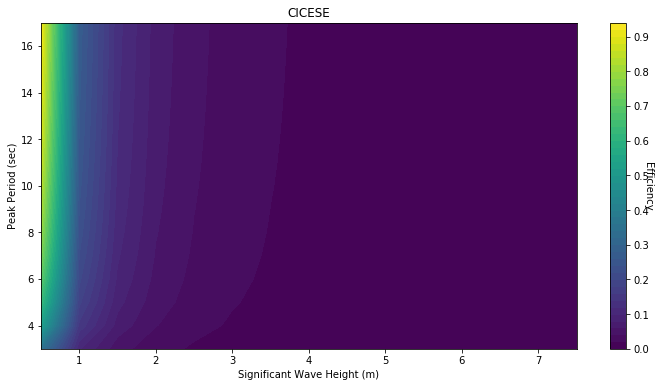

In [545]:
pathname = '/home/lioc/Documents/cicese/data/Final_data/'
filename = 'cicese.csv'
df = pd.read_csv(pathname + filename)

# h = df.index.values
# t = df.columns[1:].values

t = np.arange(3,18)
h = np.arange(0.5,8.0,0.5)

# matrix for wave height and period
H, T = np.meshgrid(h, t)

ef = np.array(df.iloc[:,1:])

# plot mean values
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
CT = ax.contourf(H, T, ef.T, 50)
# ax.set_title(title)
ax.set_xlabel('Significant Wave Height (m)')
ax.set_ylabel('Peak Period (sec)')
ax.set_title('CICESE')
cbar = plt.colorbar(CT)
cbar.set_label('Efficiency', rotation=270)


### Oyster

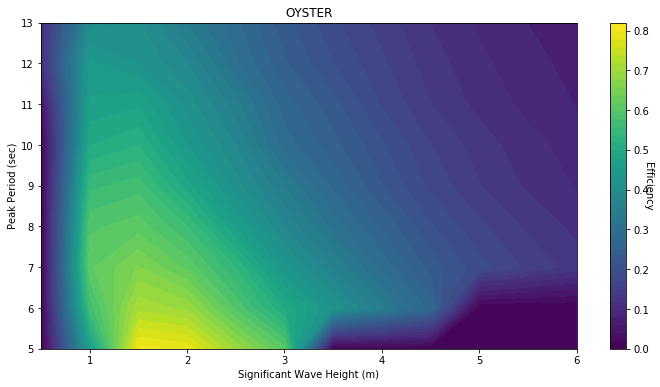

In [550]:
pathname = '/home/lioc/Documents/cicese/data/Final_data/'
filename = 'oyster.csv'
df = pd.read_csv(pathname + filename)

# h = df.index.values
# t = df.columns[1:].values

t = np.arange(5,14)
h = np.arange(0.5,6.5,0.5)

# matrix for wave height and period
H, T = np.meshgrid(h, t)

ef = np.array(df.iloc[:,1:])

# plot mean values
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
CT = ax.contourf(H, T, ef.T, 50)
# ax.set_title(title)
ax.set_xlabel('Significant Wave Height (m)')
ax.set_ylabel('Peak Period (sec)')
ax.set_title('OYSTER')
cbar = plt.colorbar(CT)
cbar.set_label('Efficiency', rotation=270)


In [547]:
df

,Periodo,5,6,7,8,9,10,11,12,13
0,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041229,0.113379,0.104657
1,1.0,0.453515,0.566893,0.615484,0.595238,0.554296,0.498866,0.463822,0.444067,0.392465
2,1.5,0.806248,0.713866,0.662275,0.610985,0.571093,0.519022,0.476420,0.419921,0.403124
3,2.0,0.793651,0.694444,0.615484,0.559807,0.488158,0.439342,0.412286,0.380291,0.340136
4,2.5,0.696599,0.595616,0.539035,0.458050,0.409171,0.379138,0.347969,0.303855,0.284668
5,3.0,0.607206,0.497606,0.426520,0.379504,0.340136,0.289746,0.270276,0.242504,0.227726
6,3.5,0.000000,0.418036,0.359639,0.311213,0.275605,0.247119,0.227178,0.200534,0.185108
7,4.0,0.000000,0.343679,0.293570,0.256874,0.220459,0.203373,0.177798,0.164163,0.150990
8,4.5,0.000000,0.271549,0.231956,0.202962,0.174189,0.160690,0.140483,0.129709,0.119301
9,5.0,0.000000,0.000000,0.187885,0.164399,0.141093,0.130159,0.113791,0.105064,0.096634


### Dragon

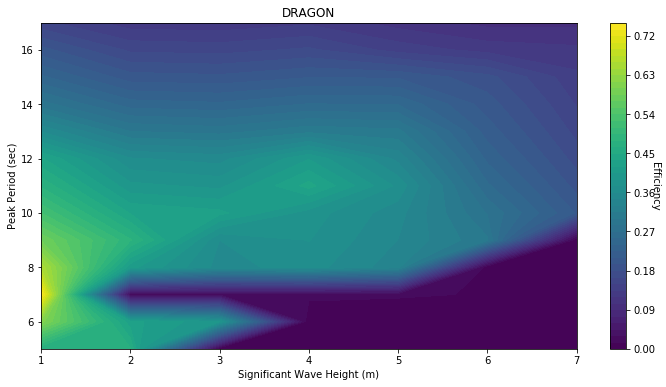

In [555]:
pathname = '/home/lioc/Documents/cicese/data/Final_data/'
filename = 'dragon.csv'
df = pd.read_csv(pathname + filename)

t = np.arange(5,18)
h = np.arange(1,8)

# matrix for wave height and period
H, T = np.meshgrid(h, t)

ef = np.array(df.iloc[:,1:])

# plot mean values
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
CT = ax.contourf(H, T, ef.T, 50)
# ax.set_title(title)
ax.set_xlabel('Significant Wave Height (m)')
ax.set_ylabel('Peak Period (sec)')
ax.set_title('DRAGON')
cbar = plt.colorbar(CT)
cbar.set_label('Efficiency', rotation=270)

In [552]:
df

,Periodo,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,0.466472,0.607386,0.749688,0.655977,0.583090,0.524781,0.477074,0.437318,0.358825,0.291545,0.242954,0.200437,0.154347
1,2,0.466472,0.425170,0.019783,0.409985,0.481859,0.433673,0.394249,0.361395,0.299955,0.247293,0.201652,0.161716,0.126479
2,3,0.000000,0.391426,0.021287,0.354308,0.359932,0.424360,0.385782,0.353634,0.294037,0.242954,0.198683,0.158933,0.124812
3,4,0.000000,0.000000,0.019783,0.366709,0.375567,0.382653,0.440631,0.403912,0.310468,0.255753,0.208941,0.167980,0.131838
4,5,0.000000,0.000000,0.017326,0.336006,0.344671,0.351020,0.371058,0.340136,0.304553,0.253644,0.207969,0.143950,0.113188
5,6,0.000000,0.000000,0.013710,0.000000,0.302343,0.283447,0.257679,0.236206,0.218036,0.202462,0.185185,0.129323,0.100040
6,7,0.000000,0.000000,0.011560,0.000000,0.000000,0.208247,0.189315,0.173539,0.160190,0.148748,0.138831,0.123646,0.100448
